<a href="https://colab.research.google.com/github/FLCL4LIFE/Player-to-purchase-in-English-Premier-League-2019-2020-season/blob/main/Ryan_Mehdian_FinalProject_xxx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Soccer_df = pd.read_csv('Soccer.csv')

In [3]:
columns = ['Player', 'Nation', 'Pos', 'Age', 'Born', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'PK', 'PKatt']

In [4]:
Soccer_df = Soccer_df[columns]

In [5]:
Soccer_df = Soccer_df.dropna()

In [6]:
Soccer_df = Soccer_df.loc[(Soccer_df.Pos == 'FW')]

In [7]:
Soccer_df.sort_values(by='Gls')

,Player,Nation,Pos,Age,Born,MP,Starts,Min,Gls,Ast,PK,PKatt
206,Odion Ighalo,ng NGA,FW,30.0,1989.0,11.0,0.0,101,0.0,0.0,0.0,0.0
222,Bruno Jordão,pt POR,FW,20.0,1998.0,1.0,0.0,7,0.0,0.0,0.0,0.0
102,Keinan Davis,eng ENG,FW,21.0,1998.0,18.0,4.0,548,0.0,0.0,0.0,0.0
333,Georges-Kévin N'Koudou,fr FRA,FW,24.0,1995.0,1.0,0.0,3,0.0,0.0,0.0,0.0
75,Andy Carroll,eng ENG,FW,30.0,1989.0,19.0,4.0,632,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
407,Mohamed Salah,eg EGY,FW,27.0,1992.0,34.0,33.0,"2,876",19.0,10.0,3.0,3.0
445,Raheem Sterling,eng ENG,FW,24.0,1994.0,33.0,30.0,"2,651",20.0,1.0,0.0,2.0
25,Pierre-Emerick Aubameyang,ga GAB,FW,30.0,1989.0,36.0,35.0,"3,136",22.0,3.0,2.0,2.0
208,Danny Ings,eng ENG,FW,27.0,1992.0,38.0,32.0,"2,804",22.0,2.0,1.0,2.0


In [8]:
Soccer_df.head()
Soccer_df.sort_values(by='Ast')

,Player,Nation,Pos,Age,Born,MP,Starts,Min,Gls,Ast,PK,PKatt
172,Andre Gray,eng ENG,FW,28.0,1991.0,23.0,7.0,755,2.0,0.0,0.0,0.0
153,Kieron Freeman,wal WAL,FW,27.0,1992.0,2.0,0.0,7,0.0,0.0,0.0,0.0
408,Mbwana Samatta,tz TAN,FW,26.0,1992.0,14.0,11.0,943,1.0,0.0,0.0,0.0
165,Olivier Giroud,fr FRA,FW,32.0,1986.0,18.0,12.0,993,8.0,0.0,0.0,0.0
288,Josh Martin,eng ENG,FW,17.0,2001.0,5.0,0.0,37,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
281,Sadio Mané,sn SEN,FW,27.0,1992.0,35.0,31.0,"2,747",18.0,7.0,0.0,0.0
380,Marcus Rashford,eng ENG,FW,21.0,1997.0,31.0,31.0,"2,643",17.0,7.0,6.0,8.0
141,Roberto Firmino,br BRA,FW,27.0,1991.0,38.0,34.0,"2,988",9.0,8.0,0.0,0.0
279,Riyad Mahrez,dz ALG,FW,28.0,1991.0,33.0,21.0,"1,944",11.0,9.0,1.0,1.0


In [9]:
def corrbubble(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_value = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.8, cmap="bwr",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 50 + 5
    ax.annotate(corr_value, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def scatter_corrbubble(df):
    sns.set(style='white', font_scale=1.6);
    g = sns.PairGrid(df, aspect=1.4, diag_sharey=False);
    g.map_lower(sns.regplot, lowess=True, ci=True, line_kws={'color': 'red'});
    g.map_diag(sns.distplot, kde_kws={'color': 'darkblue'});
    g.map_upper(corrbubble);

In [10]:
Soccer_df.describe()

,Age,Born,MP,Starts,Gls,Ast,PK,PKatt
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,24.810127,1993.835443,21.379747,14.417722,5.962025,2.113924,0.481013,0.632911
std,4.630102,4.538808,12.231007,11.931006,6.603113,2.449423,1.175179,1.433815
min,17.000000,1983.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1990.000000,12.500000,3.500000,1.000000,0.000000,0.000000,0.000000
50%,24.000000,1994.000000,24.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,28.000000,1997.000000,32.000000,24.500000,10.000000,3.000000,0.000000,1.000000
max,35.000000,2002.000000,38.000000,37.000000,23.000000,10.000000,6.000000,8.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is

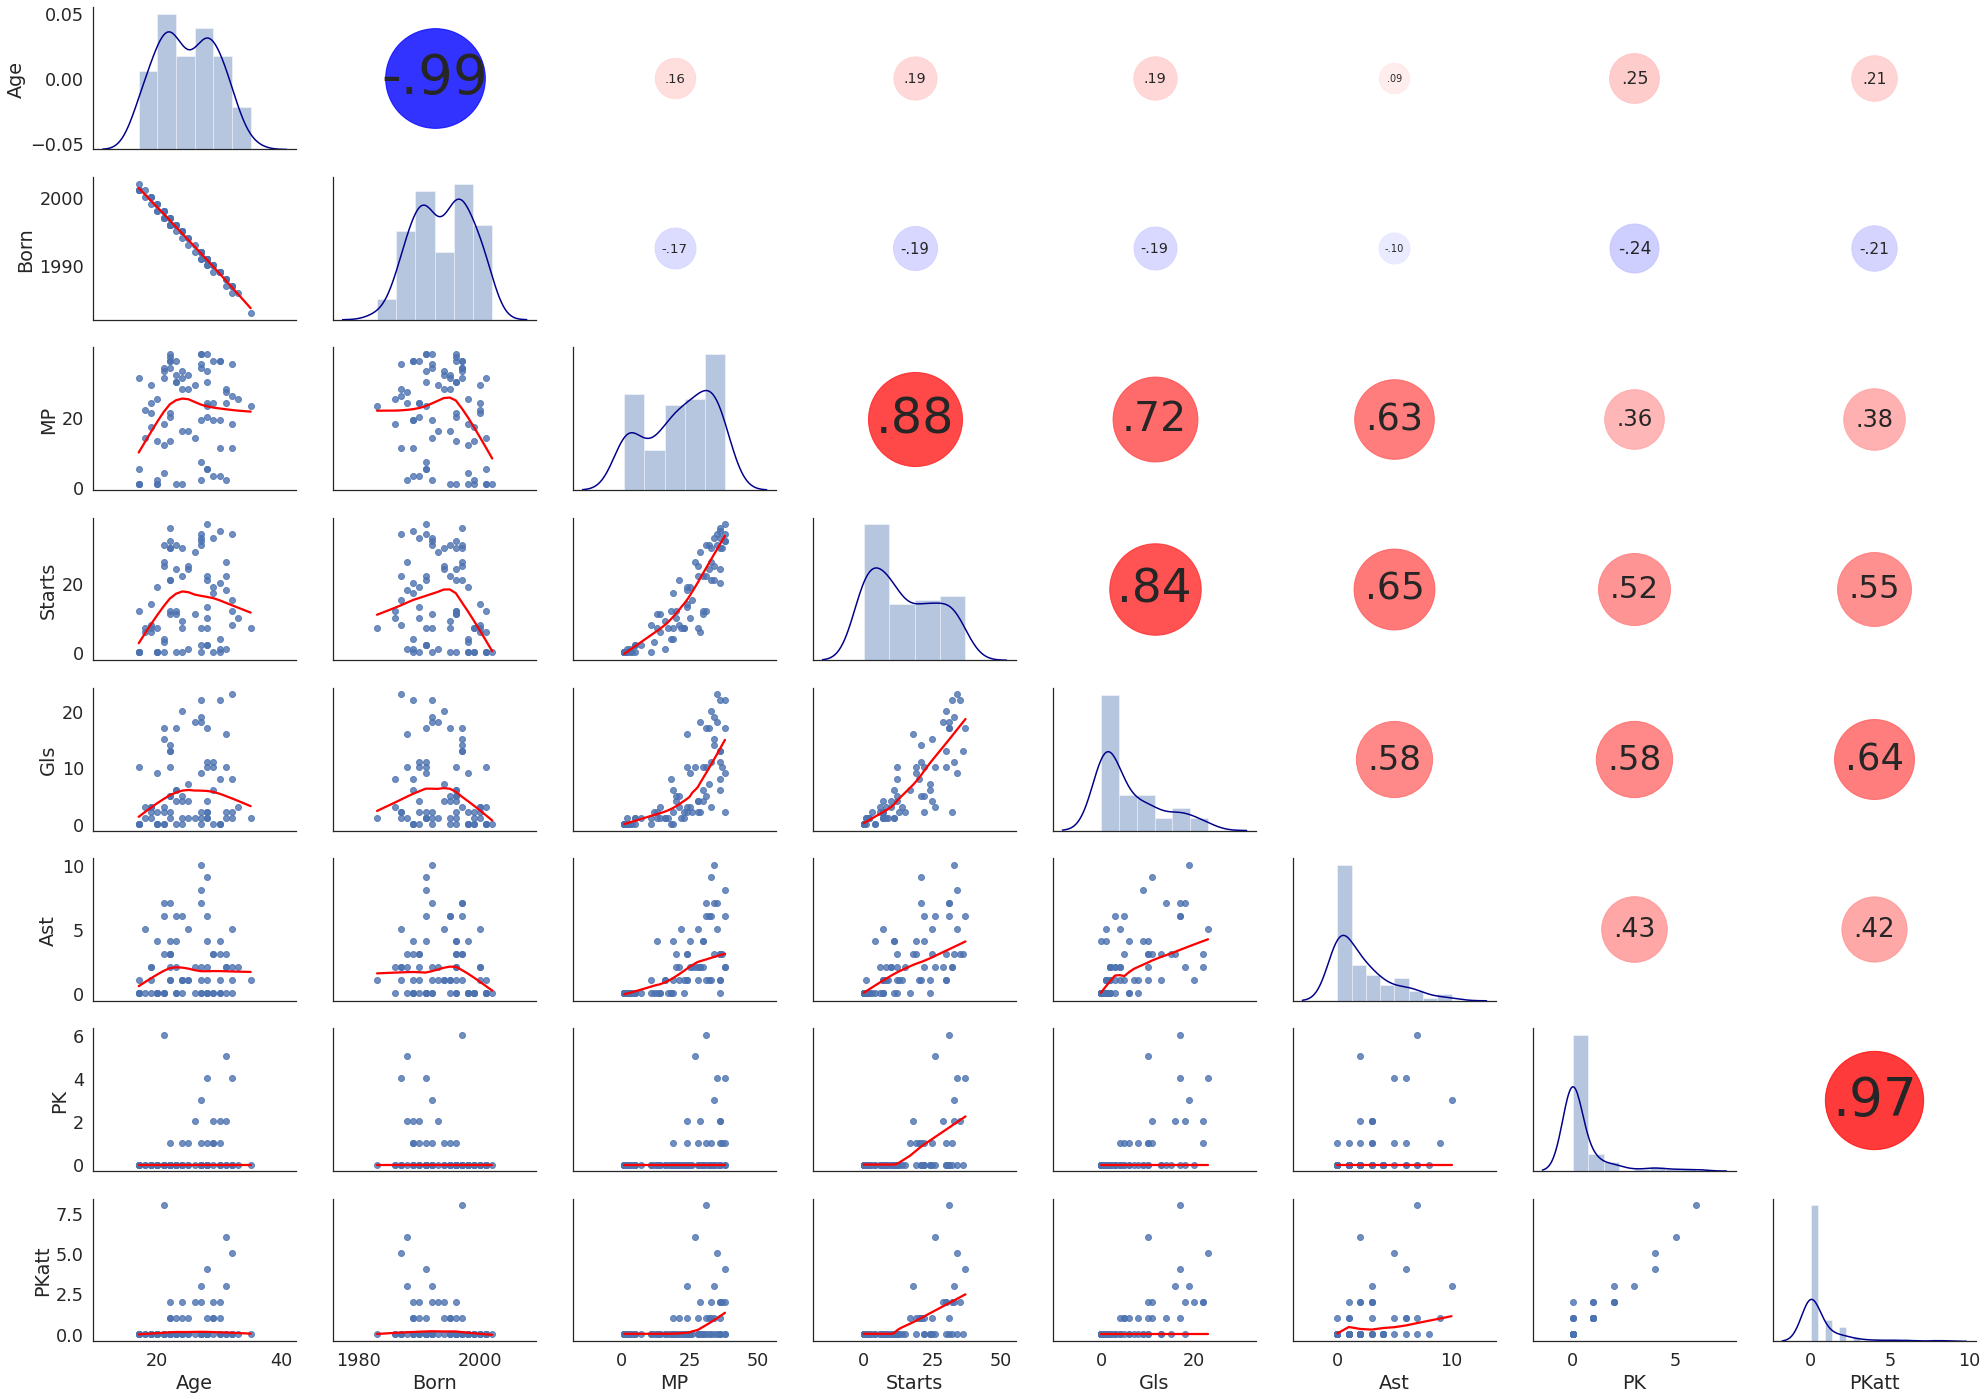

In [11]:
scatter_corrbubble(Soccer_df)

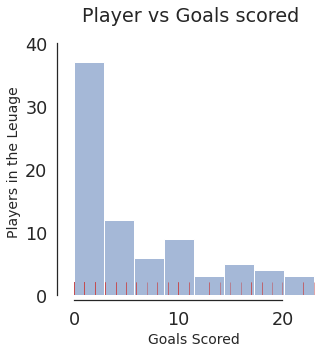

In [12]:
sns.displot(Soccer_df['Gls'], 
            rug=True,
            rug_kws={"color": "r", "alpha":0.5, "linewidth": 1, "height":.05 }, 
            alpha = .5
            );
plt.title('Player vs Goals scored ')
plt.xlabel("Goals Scored", fontsize=14)
plt.ylabel("Players in the Leuage", fontsize=14)
sns.despine(offset=5, trim=True)

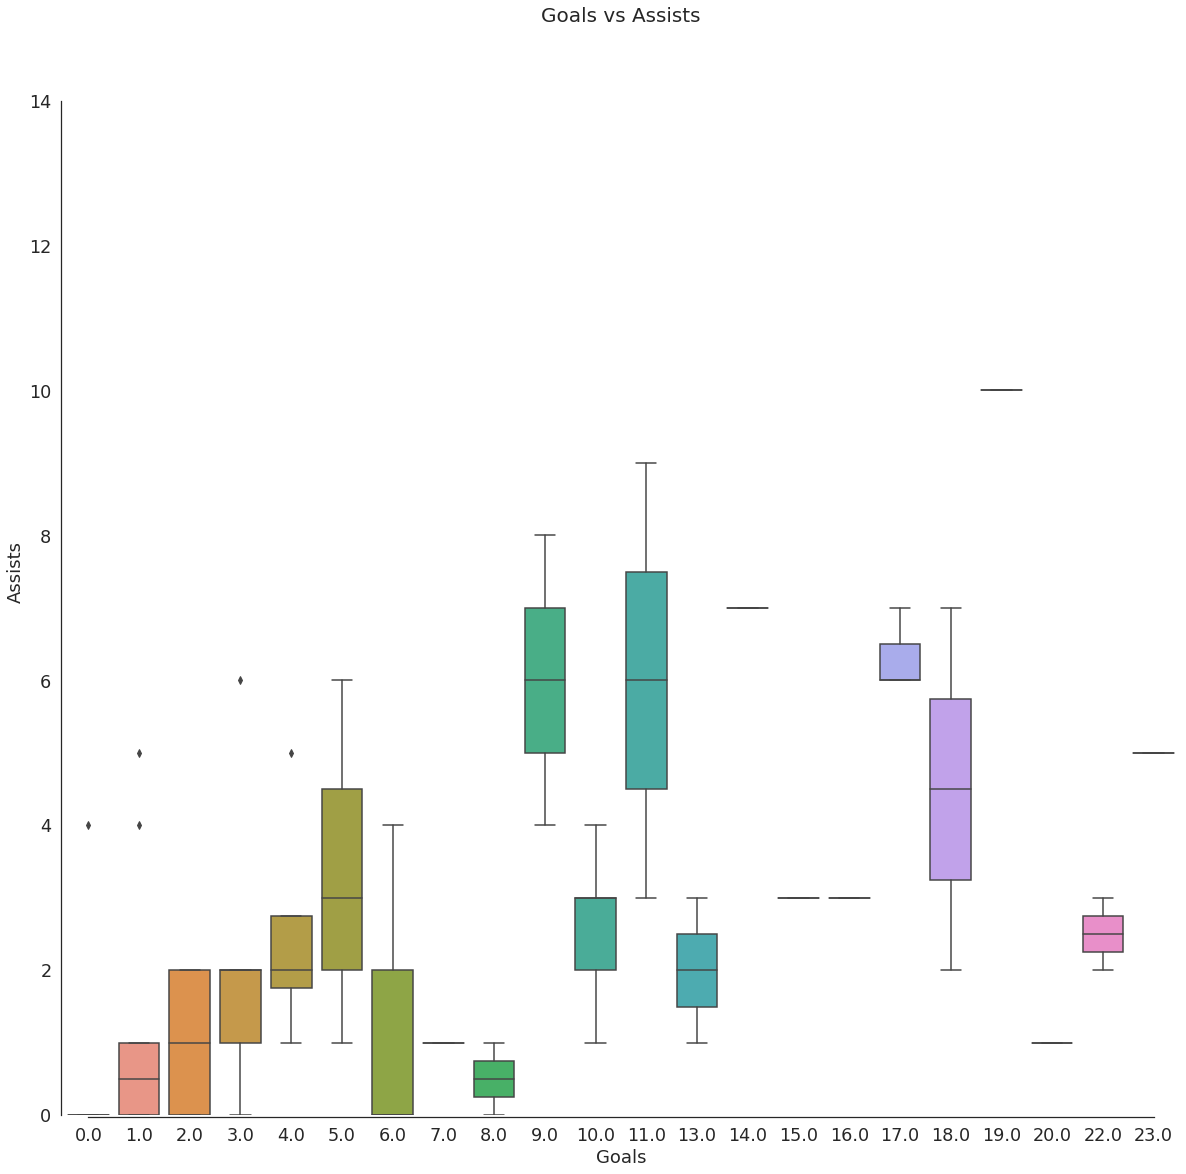

In [13]:
fig, axs = plt.subplots(figsize=(20, 20))
df = Soccer_df
# Boxplot
sns.boxplot(x=df['Gls'],y=df['Ast'])

# Define x-axis limits and label
axs.set_ylim(0, 15)
axs.set_xlabel('Goals', fontsize=18)
axs.set_ylabel('Assists', fontsize=18)

# Title each plot
axs.set_title('Goals vs Assists', ha='center', fontsize=20)

# Clean up each plot
sns.despine(ax=axs, offset=2, trim=True)

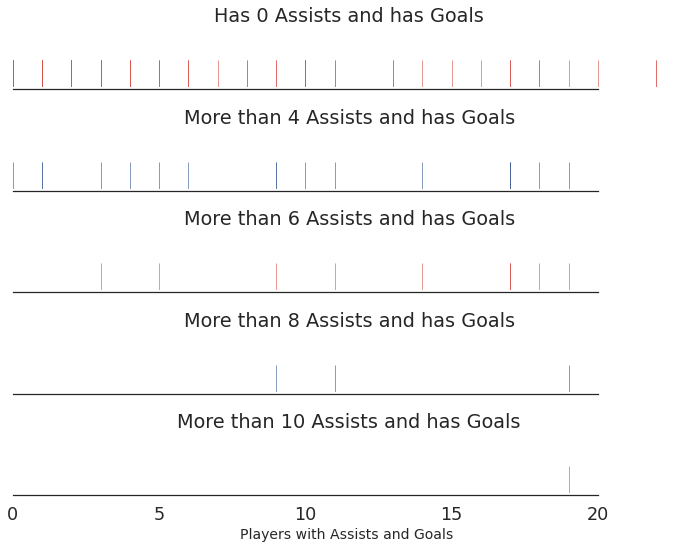

In [14]:
# Collect two data sets as NumPy arrays
data_Soccer_df = []
data_Soccer_df.append(Soccer_df.loc[Soccer_df.Ast >= 0, ['Gls']] )
data_Soccer_df.append(Soccer_df.loc[Soccer_df.Ast >= 4, ['Gls']] )
data_Soccer_df.append(Soccer_df.loc[Soccer_df.Ast >= 6, ['Gls']] )
data_Soccer_df.append(Soccer_df.loc[Soccer_df.Ast >= 8, ['Gls']] )
data_Soccer_df.append(Soccer_df.loc[Soccer_df.Ast >= 10, ['Gls']] )


# Define the plot layout
fig, axs = plt.subplots(figsize=(10, 8.0), nrows=5, ncols=1, sharex=True)

# Define plot colors and titles
clr = [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["denim blue"], sns.xkcd_rgb["pale red"]\
       , sns.xkcd_rgb["denim blue"], sns.xkcd_rgb["pale red"]]
ttl = ['Has 0 Assists and has Goals', 'More than 4 Assists and has Goals', 'More than 6 Assists and has Goals', 
      'More than 8 Assists and has Goals', 'More than 10 Assists and has Goals']

for idx, data in enumerate(data_Soccer_df):
  # Rugplot, with set rug height, thickness, and color
  sns.rugplot(ax = axs[idx], x=data['Gls'], height=0.45, lw=0.6, c = clr[idx])
  
  # No y-axis
  axs[idx].set_yticks([])
  
  # Define x-axis limits and label
  axs[idx].set_xlim(0, 23)
  axs[idx].set_xlabel('Players with Assists and Goals ', fontsize=14)
  
  # Title each plot
  axs[idx].set_title(ttl[idx])
  
  # Clean up each plot
  sns.despine(ax=axs[idx], left=True, offset=2, trim=True)

plt.tight_layout()

In [15]:
Goals = Soccer_df['Gls']
Matches =Soccer_df['MP']

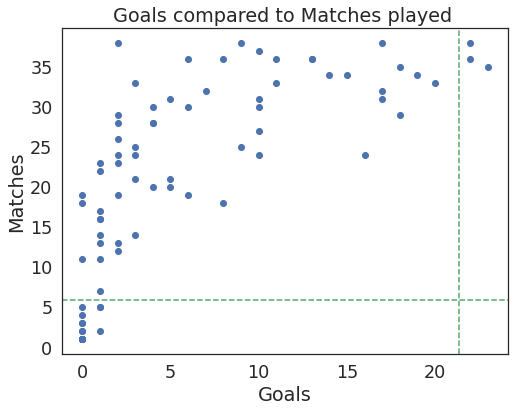

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(Goals, Matches )
plt.axhline(y=np.mean(Goals), color='g', linestyle='--')
plt.axvline(x=np.mean(Matches), color='g', linestyle='--');

plt.title("Goals compared to Matches played ")
plt.xlabel("Goals")
plt.ylabel("Matches")
plt.show()